In [1]:
import warnings

warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import gwpy

In [2]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

gps = event_gps("GW150914")
print("GW150914 GPS:", gps)

ldata = TimeSeries.fetch_open_data("L1", int(gps) - 512, int(gps) + 512, cache=True)
print("GW150914 data")
print(ldata)

GW150914 GPS: 1126259462.4
GW150914 data
TimeSeries([-1.35583146e-18, -1.35451165e-18, -1.38088351e-18,
            ..., -1.03338605e-18, -1.02402094e-18,
            -1.01089797e-18]
           unit: dimensionless,
           t0: 1126258950.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


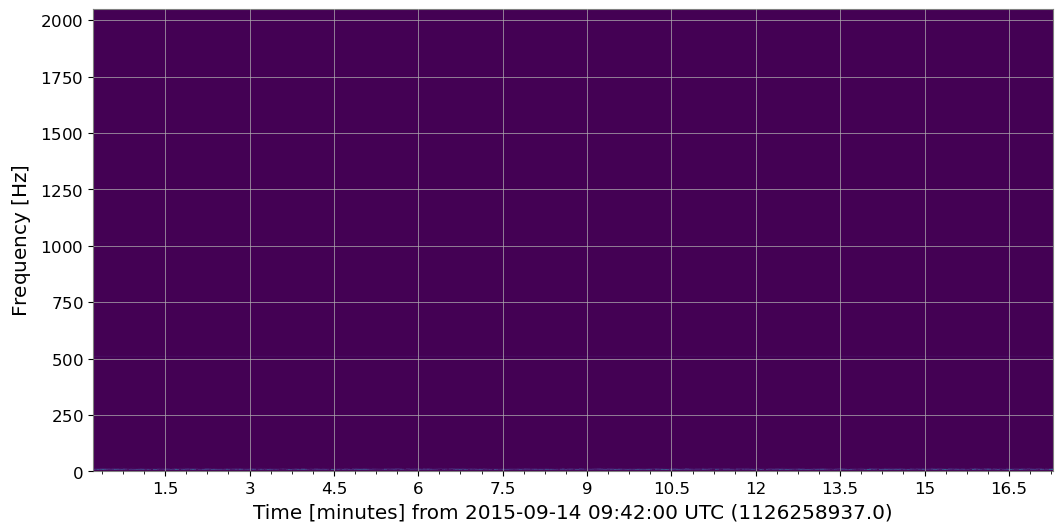

In [3]:
specgram = ldata.spectrogram2(fftlength=4, overlap=2, window="hann") ** (1 / 2.0)
plot = specgram.plot()

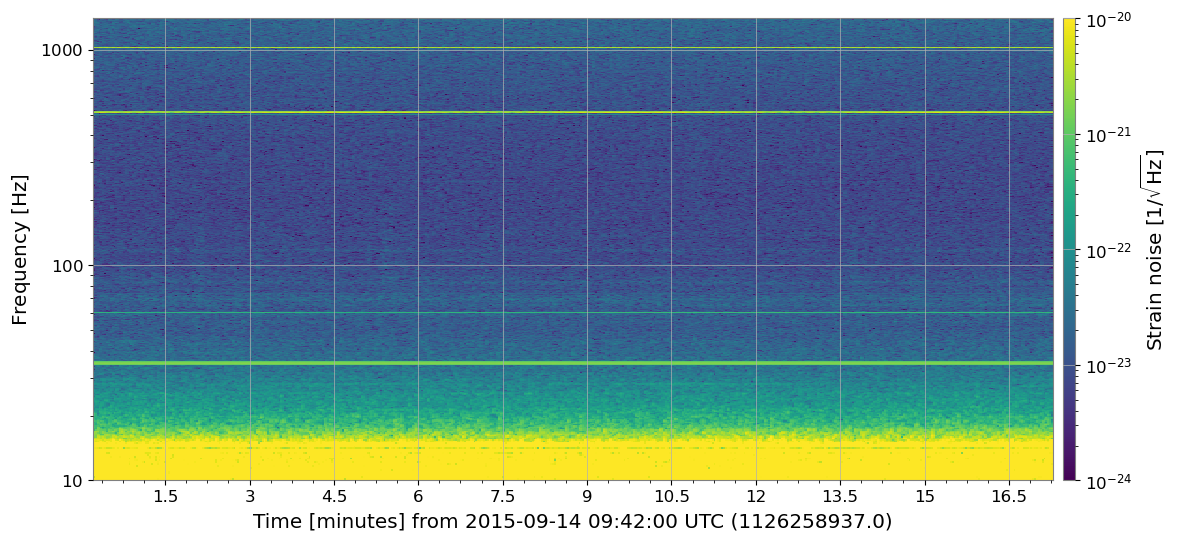

In [4]:
ax = plot.gca()
ax.set_yscale("log")
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot  # refresh

In [5]:
segment = (int(gps) - 30, int(gps) + 2)
hdata = TimeSeries.fetch_open_data("H1", *segment, verbose=True, cache=True)

Fetched 1 URLs from gwosc.org for [1126259432 .. 1126259464))
Reading data... [Done]


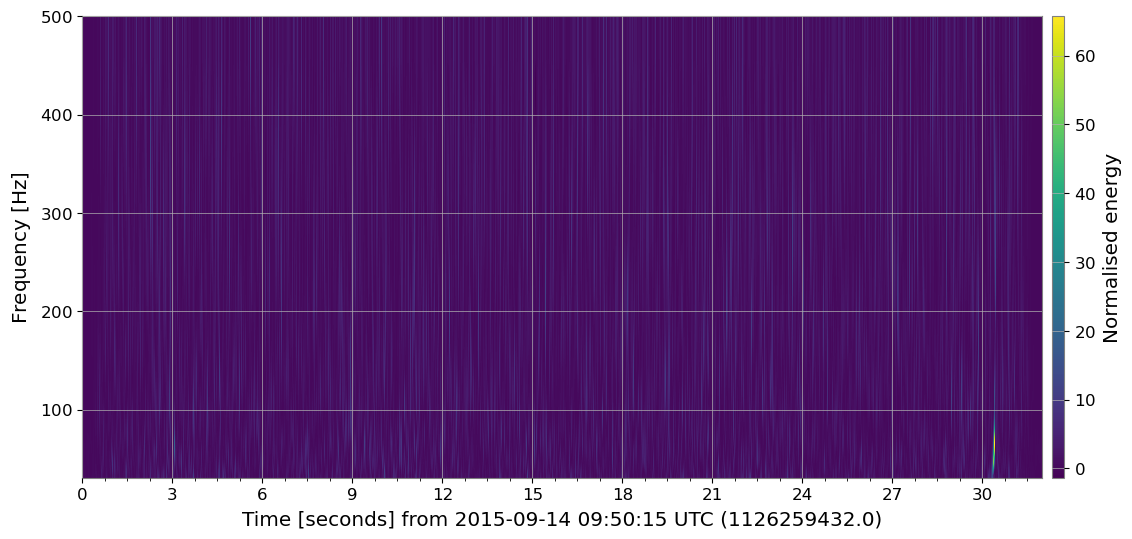

In [6]:
hq = hdata.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

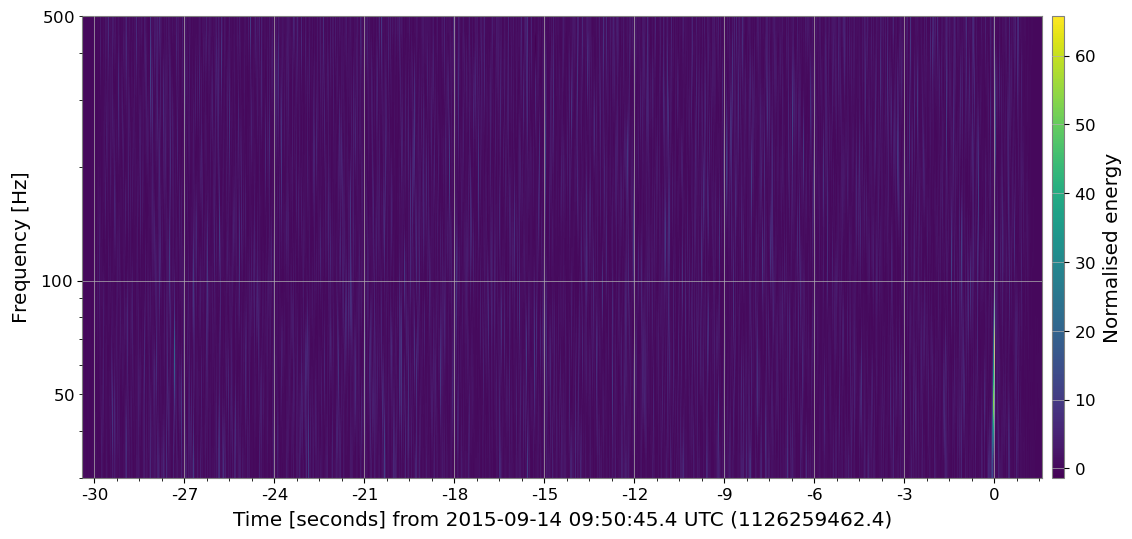

In [7]:
ax = plot.gca()
ax.set_epoch(gps)
ax.set_ylim(30, 500)
ax.set_yscale("log")
plot  # refresh

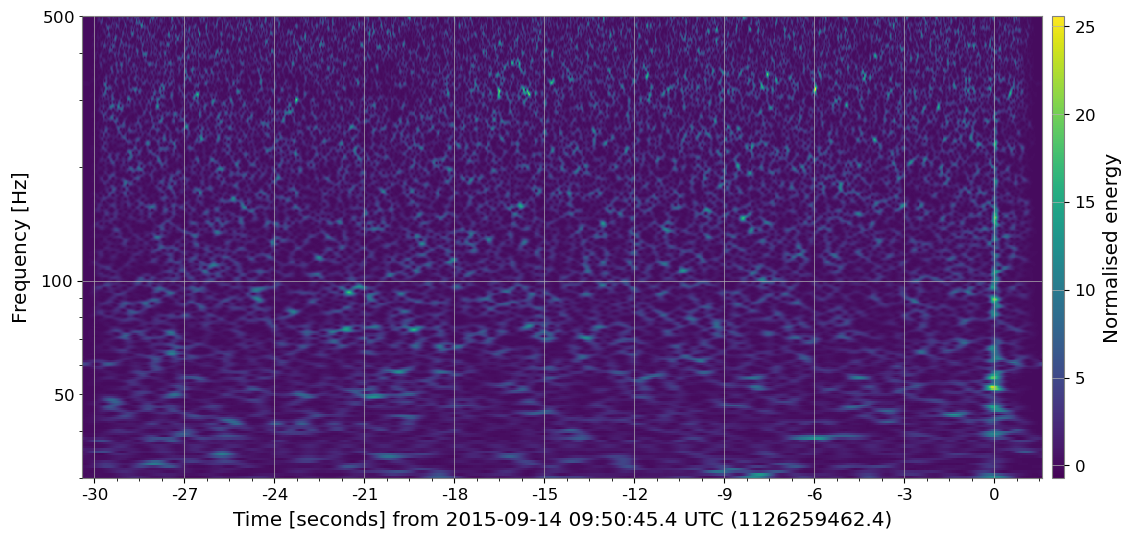

In [8]:
hq = hdata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale("log")
ax.colorbar(label="Normalised energy")

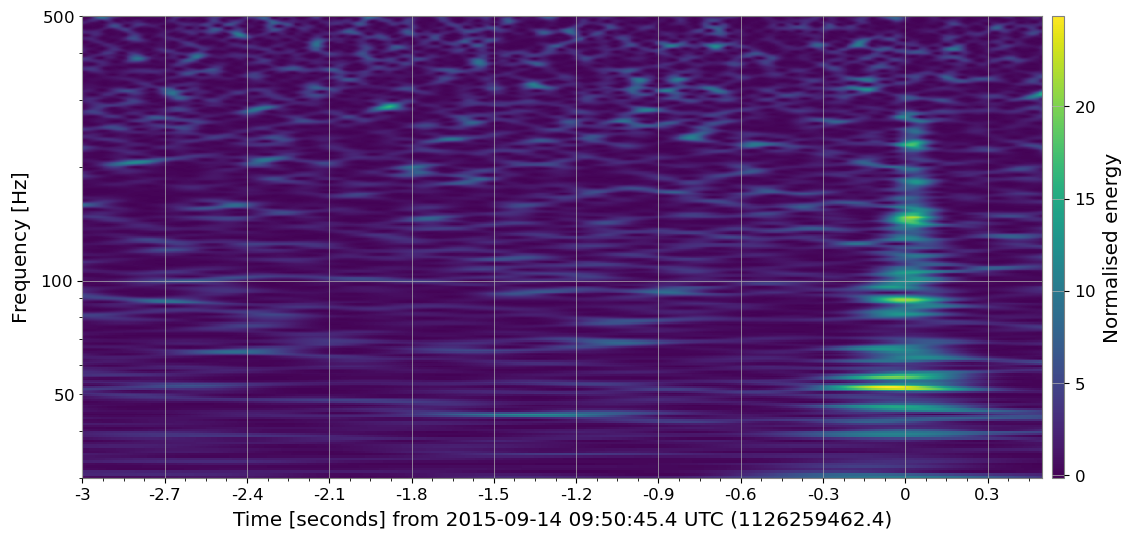

In [9]:
# -- Use OUTSEG for small time range
hq2 = hdata.q_transform(frange=(30, 500), qrange=(80, 110), outseg=(gps - 3, gps + 0.5))
plot = hq2.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale("log")
ax.colorbar(label="Normalised energy")

In [10]:
ldata = TimeSeries.fetch_open_data("L1", *segment, verbose=True)

Fetched 1 URLs from gwosc.org for [1126259432 .. 1126259464))
Reading data... [Done]


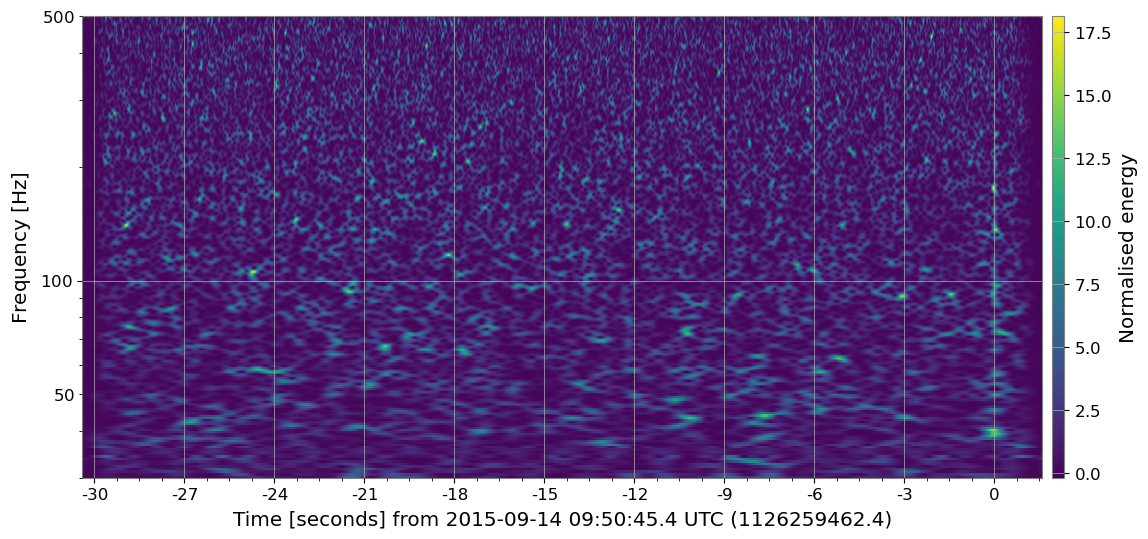

In [17]:
lq = ldata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = lq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale("log")
ax.colorbar(label="Normalised energy")

In [18]:
plot.colorbars[0].mappable.set_clim(0, 20)
plot.refresh()
plot

AttributeError: 'Colorbar' object has no attribute 'draw_all'